In [1]:
import pandas as pd

qldpc_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/qldpc_acc_with_data_qubits_results_20250516_011317.csv"

# 读取CSV文件
qldpc_df_acc = pd.read_csv(qldpc_file_path)

In [2]:
# qldpc_df_acc_72 = qldpc_df_acc[conditions_acc]

qldpc_merged_df_acc = qldpc_df_acc.groupby(['nkd', 'round','probability','noise_model', 'decoder_method','have_stabilizer']
                                    , as_index=False)['logical_error_rate'].mean()

In [3]:
qldpc_merged_df_acc

,nkd,round,probability,noise_model,decoder_method,have_stabilizer,logical_error_rate
0,"[108, 8, 10]",1,10,si1000,BP+OSD,True,0.000013
1,"[108, 8, 10]",1,10,si1000,EAMLD,True,0.000527
2,"[144, 12, 12]",1,10,si1000,BP+OSD,True,0.000003
3,"[144, 12, 12]",1,10,si1000,EAMLD,True,0.000427
4,"[72, 12, 6]",1,10,si1000,BP+OSD,True,0.000555
5,"[72, 12, 6]",1,10,si1000,EAMLD,True,0.001220
6,"[90, 8, 10]",1,10,si1000,BP+OSD,True,0.000026
7,"[90, 8, 10]",1,10,si1000,EAMLD,True,0.000589


打印为表格的形式

In [4]:
nkds = [[72, 12, 6], [90, 8, 10], [108, 8, 10], [144, 12, 12]]
decoder_methods = ["BP+OSD", "EAMLD"]

for nkd in nkds:
    for decoder_method in decoder_methods:
        conditions_acc = (qldpc_merged_df_acc['nkd'] == str(nkd)) & (qldpc_merged_df_acc['decoder_method'] == decoder_method)
        logical_error_rate = qldpc_merged_df_acc[conditions_acc]["logical_error_rate"].values[0]

        print(f"{nkd} & {decoder_method} & {logical_error_rate:g} \\\\")

[72, 12, 6] & BP+OSD & 0.000555 \\
[72, 12, 6] & EAMLD & 0.00122 \\
[90, 8, 10] & BP+OSD & 2.6e-05 \\
[90, 8, 10] & EAMLD & 0.000589 \\
[108, 8, 10] & BP+OSD & 1.25e-05 \\
[108, 8, 10] & EAMLD & 0.000527 \\
[144, 12, 12] & BP+OSD & 3e-06 \\
[144, 12, 12] & EAMLD & 0.000427 \\


no data with surface code

In [1]:
import pandas as pd

surface_file_path = "/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/result/noisy_varying_surface_code_acc_threshold_results_20250513_160718.csv"

# 读取CSV文件
surface_df_acc = pd.read_csv(surface_file_path)



In [6]:
surface_df_acc

surface_merged_df_acc = surface_df_acc.groupby(['d', 'round', 'probability', 'noise_model','decoder_method', 'have_stabilizer'],
                               as_index=False)['logical_error_rate'].mean()
surface_merged_df_acc = surface_merged_df_acc[surface_merged_df_acc["decoder_method"] == "EAMLD"]

In [7]:
surface_merged_df_acc

,d,round,probability,noise_model,decoder_method,have_stabilizer,logical_error_rate
0,3,1,0.0001,si1000,EAMLD,False,1.950000e-07
2,3,1,0.0010,si1000,EAMLD,False,2.130000e-06
4,3,1,0.0100,si1000,EAMLD,False,2.106000e-05
6,3,1,0.1000,si1000,EAMLD,False,2.037550e-04
8,3,1,1.0000,si1000,EAMLD,False,2.061870e-03
10,5,1,0.0001,si1000,EAMLD,False,3.900000e-07
12,5,1,0.0010,si1000,EAMLD,False,3.565000e-06
14,5,1,0.0100,si1000,EAMLD,False,3.516000e-05
16,5,1,0.1000,si1000,EAMLD,False,3.491700e-04
18,5,1,1.0000,si1000,EAMLD,False,3.492845e-03


In [8]:
colors = {
    3: '#4A7BB7',  # 红
    5: '#E19447',  # 绿
    7: '#6A9D58',  # 蓝
}

markers = {
    3: '.',  
    5: '.',  
    7: '.',  
}


linestyles = {
    3: '-',  
    5: '-',    
    7: '-',  
}

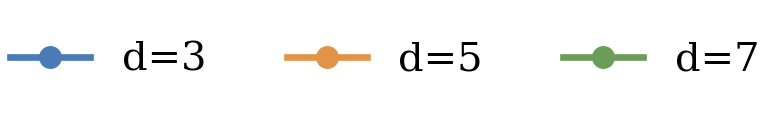

In [9]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path

plt.rcParams['font.family'] = 'serif'  # 使用衬线字体

# 创建图例元素
legend_elements = []
for key in colors.keys():
    line = Line2D([0], [0], color=colors[key], marker=markers[key], linestyle=linestyles[key],
                  label=f"d={key}", markersize=20*1.5, linewidth=4*1.2, markeredgewidth=1.5)
    legend_elements.append(line)

# prop={'size': 24*1.2, 'family': 'serif', 'weight': 'bold'}
prop={'size': 24*1.2}

# 创建一个空的图形
fig, ax = plt.subplots(figsize=(len(legend_elements)*2, 1))  # 根据图例数量调整宽度

ax.legend(handles=legend_elements, loc='center', ncol=len(legend_elements), 
          frameon=False, borderpad=0, prop=prop)  # 设置字体大小为12

# 隐藏坐标轴和边框
ax.axis('off')
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # 去除空白边距

# 保存图片为PDF
save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/data_qubits_acc")
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / f"no_data_threshold_legend.pdf"
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

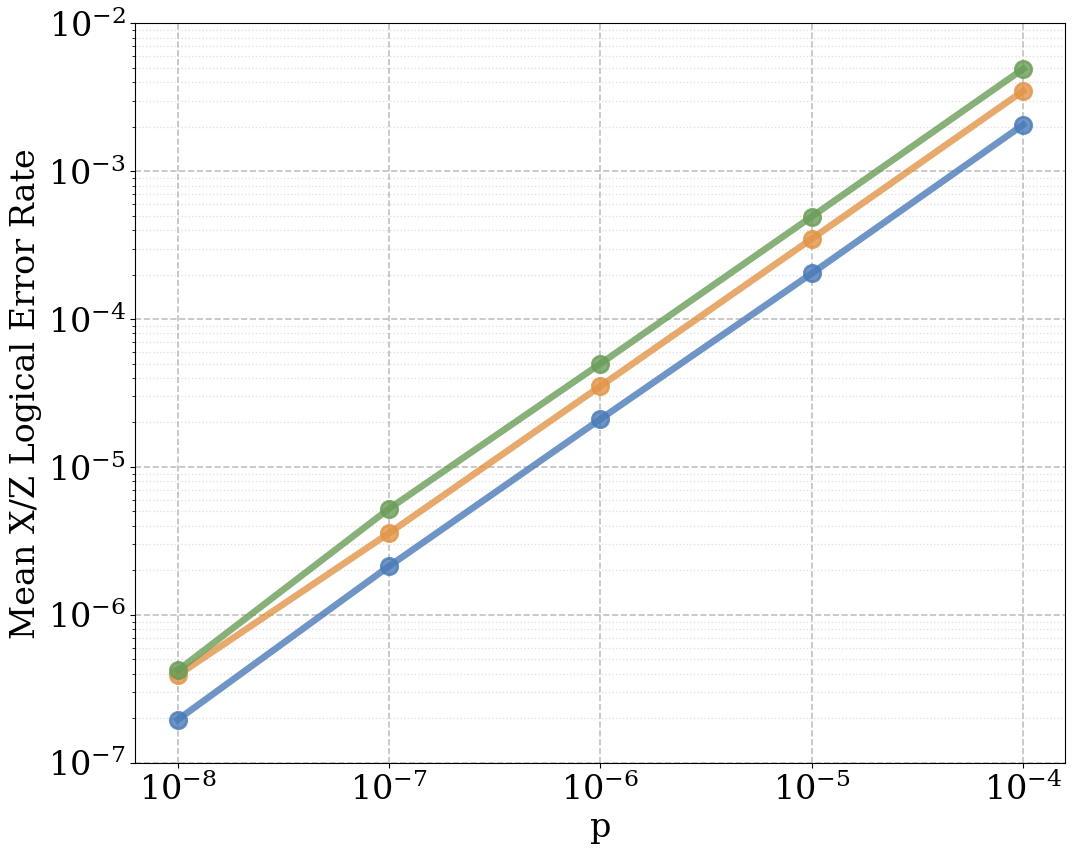

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

# 设置全局缩放因子
SCALE_FACTOR = 1.2  # 根据需要调整这个值（1.2-2.0之间）

def plot_logical_error_rate_ax(ax, df, r, code, colors, markers, linestyles, 
                             x_ticks=[10**-8, 10**-7, 10**-6, 10**-5, 10**-4], show_x_ticks=True, 
                             show_y_ticks=True, y_ticks=[0.001, 0.01, 0.1, 1], 
                             use_markevery=False):
    # 按比例放大的参数
    TITLE_SIZE = 24 * SCALE_FACTOR
    LABEL_SIZE = 20 * SCALE_FACTOR
    TICK_SIZE = 20 * SCALE_FACTOR
    MARKER_SIZE = 20 * SCALE_FACTOR
    LINE_WIDTH = 4 * SCALE_FACTOR
    LEGEND_SIZE = 20 * SCALE_FACTOR
    
    sorted_d = [3, 5, 7]

    if use_markevery:
        markevery = (0, df['decoder_method'].nunique())
    else:
        markevery = None

    for label in sorted_d:
        if label in df['d'].unique():
            group = df[df['d'] == label]
            ax.plot(group['probability']/10000,
                    group['logical_error_rate'],
                    color=colors[label],
                    marker=markers[label],
                    linestyle=linestyles[label],
                    label=label,
                    alpha=0.8,
                    markersize=MARKER_SIZE,
                    linewidth=LINE_WIDTH,
                    markevery=markevery,
                    markeredgewidth=1.5*SCALE_FACTOR)
            if use_markevery:
                markevery = (markevery[0] + 1, markevery[1])

    # title = f'{code} with r={r}'
    # ax.set_title(title, fontsize=TITLE_SIZE, pad=20*SCALE_FACTOR)  # 增加标题间距

    ax.set_xscale('log')
    
    if show_x_ticks:
        ax.set_xlabel('p', fontsize=LABEL_SIZE)
        ax.set_xticks(x_ticks)
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=TICK_SIZE)
    else:
        ax.set_xticks(x_ticks)
        ax.set_xticklabels([])
        ax.tick_params(axis='x', which='minor', bottom=False)
        ax.tick_params(axis='x', labelsize=TICK_SIZE)

    
    ax.set_yscale('log')

    if show_y_ticks:
        ax.set_ylabel('Mean X/Z Logical Error Rate', fontsize=LABEL_SIZE)
        ax.set_yticks(y_ticks)
        # ax.set_yticklabels([f"{y:.2f}" if y < 0.1 else f"{y:.1f}" for y in y_ticks], 
                        #  fontsize=TICK_SIZE)
        ax.tick_params(axis='y', which='major', labelsize=TICK_SIZE)
    else:
        ax.set_yticks(y_ticks)
        ax.set_yticklabels([])
        ax.tick_params(axis='y', which='major', labelsize=TICK_SIZE)

    # 增强网格线可见性
    ax.minorticks_on()
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='x', linewidth=1*SCALE_FACTOR)
    ax.grid(False, which='minor', axis='x')
    ax.grid(True, linestyle='--', alpha=0.8, which='major', axis='y', linewidth=1*SCALE_FACTOR)
    ax.grid(True, linestyle=':', alpha=0.4, which='minor', axis='y', linewidth=0.8*SCALE_FACTOR)
    

plt.figure(figsize=(10 * SCALE_FACTOR, 8 * SCALE_FACTOR))
ax = plt.gca()

# 绘制子图
plot_logical_error_rate_ax(ax, surface_merged_df_acc, r="1", code='Surface Code', 
                         colors=colors, markers=markers, linestyles=linestyles,
                         show_x_ticks=True, show_y_ticks=True, y_ticks=[10**-7, 10**-6, 10**-5,10**-4,10**-3,10**-2])

save_dir = Path("/home/normaluser/ck/epmld/experiment/epmld_paper_experiment/figure/data_qubits_acc")
save_dir.mkdir(parents=True, exist_ok=True)
save_path = save_dir / "no_data_threshold.pdf"
plt.savefig(save_path, format="pdf", dpi=300, bbox_inches='tight')

# 显示图形
plt.show()